In [242]:
import pandas as pd
import numpy as np
import os
import math, random, csv, json

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import KernelPCA

In [159]:
def convert_score_to_numerical(fulltime_scores):
    if fulltime_scores[0] > fulltime_scores[1]:
        return 1
    elif fulltime_scores[0] == fulltime_scores[1]:
        return 0
    else:
        return -1
    
def hometeam_gd(fulltime_scores):
    return (fulltime_scores[0] - fulltime_scores[1])

def awayteam_gd(fulltime_scores):
    return (fulltime_scores[1] - fulltime_scores[0])

In [160]:
# Read in all the data and add the year of the league as a column as well as
#the target which is the winner of the game based on the goals scored

year2008 = pd.read_csv(os.getcwd() + '/Data/2008-09Season.csv')
year2009 = pd.read_csv(os.getcwd() + '/Data/2009-10Season.csv')
year2010 = pd.read_csv(os.getcwd() + '/Data/2010-11Season.csv')
year2011 = pd.read_csv(os.getcwd() + '/Data/2011-12Season.csv')
year2012 = pd.read_csv(os.getcwd() + '/Data/2012-13Season.csv')
year2013 = pd.read_csv(os.getcwd() + '/Data/2013-14Season.csv')
year2014 = pd.read_csv(os.getcwd() + '/Data/2014-15Season.csv')
year2015 = pd.read_csv(os.getcwd() + '/Data/2015-16Season.csv')
year2016 = pd.read_csv(os.getcwd() + '/Data/2016-17Season.csv')
year2017 = pd.read_csv(os.getcwd() + '/Data/2017-18Season.csv')
year2018 = pd.read_csv(os.getcwd() + '/Data/2018-19Season.csv')

year2008['Year'] = 2008
year2009['Year'] = 2009
year2010['Year'] = 2010
year2011['Year'] = 2011
year2012['Year'] = 2012
year2013['Year'] = 2013
year2014['Year'] = 2014
year2015['Year'] = 2015
year2016['Year'] = 2016
year2017['Year'] = 2017
year2018['Year'] = 2018

year2008 = pd.DataFrame(year2008)
year2009 = pd.DataFrame(year2009)
year2010 = pd.DataFrame(year2010)
year2011 = pd.DataFrame(year2011)
year2012 = pd.DataFrame(year2012)
year2013 = pd.DataFrame(year2013)
year2014 = pd.DataFrame(year2014)
year2015 = pd.DataFrame(year2015)
year2016 = pd.DataFrame(year2016)
year2017 = pd.DataFrame(year2017)
year2018 = pd.DataFrame(year2018)

frames = [year2008, year2009, year2010, year2011, year2012, year2013, year2014, year2015, year2016, year2017, year2018]

df = pd.concat(frames)
# df['Hometeam Goal Diff'] = df[['Hometeam Score', 'Awayteam Score']].apply(hometeam_gd, axis=1)
# df['Awayteam Goal Diff'] = df[['Hometeam Score', 'Awayteam Score']].apply(awayteam_gd, axis=1)
df['target'] = df[['Hometeam Score', 'Awayteam Score']].apply(convert_score_to_numerical, axis=1)
df

Match_ID                 Hometeam                  Awayteam  \
0        6697                  Arsenal                Stoke City   
1        6698              Aston Villa          Newcastle United   
2        6699         Blackburn Rovers      West Bromwich Albion   
3        6700                   Fulham                   Everton   
4        6701                Hull City         Manchester United   
..        ...                      ...                       ...   
375     38310                   Fulham            Crystal Palace   
376     38311        Huddersfield Town                   Chelsea   
377     38316                  Watford  Brighton and Hove Albion   
378     38317  Wolverhampton Wanderers                   Everton   
379     38313        Manchester United            Leicester City   

     Hometeam Score  Awayteam Score  Home_Possession  Away_Possession  \
0                 4               1             70.8             29.2   
1                 1               0             52.8             47.2   
2                 0               0             48.8             51.2   
3                 0               2             50.4             49.6   
4                 0               1             34.9             65.1   
..              ...             ...              ...              ...   
375               0               2             66.3             33.7   
376               0               3             37.2             62.8   
377               2               0             53.2             46.8   
378               2               2             57.4             42.6   
379               2               1             46.3             53.7   

     Home_Shots_on_target  Away_Shots_on_target  Home_Total_Shots  ...  \
0                       9                     2                26  ...   
1                       2                     4                14  ...   
2                       1                     2                10  ...   
3                       4                    10                15  ...   
4                       8                     4                14  ...   
..                    ...                   ...               ...  ...   
375                     6                    10                15  ...   
376                     1                     4                 6  ...   
377                     5                     0                19  ...   
378                     4                     5                11  ...   
379                     6                     4                 8  ...   

     Home_Offsides  Away_Offsides  Home_Yellow_Cards  Away_Yellow_Cards  \
0                0              1                  1                  0   
1                3              0                  0                  1   
2                3              3                  0                  1   
3                2              5                  0                  0   
4                3              0                  2                  1   
..             ...            ...                ...                ...   
375              2              3                  1                  2   
376              2              1                  2                  1   
377              0              3                  2                  2   
378              2              3                  0                  1   
379              4              2                  2                  1   

     Home_Red_Cards  Away_Red_Cards  Home_Fouls_Conceded  Away_Fouls_Conceded  \
0                 0               0                   10                   11   
1                 0               1                    9                   10   
2                 1               0                   14                   11   
3                 0               0                   16                   12   
4                 0               0                   17                   12   
..              ...             ...

In [161]:
dropped_df = df.drop(columns=['Match_ID', 'Hometeam','Awayteam','Hometeam Score', 'Awayteam Score', 'Year', 'target'])
dropped_df

Home_Possession  Away_Possession  Home_Shots_on_target  \
0               70.8             29.2                     9   
1               52.8             47.2                     2   
2               48.8             51.2                     1   
3               50.4             49.6                     4   
4               34.9             65.1                     8   
..               ...              ...                   ...   
375             66.3             33.7                     6   
376             37.2             62.8                     1   
377             53.2             46.8                     5   
378             57.4             42.6                     4   
379             46.3             53.7                     6   

     Away_Shots_on_target  Home_Total_Shots  Away_Total_Shots  Home_Touches  \
0                       2                26                 4           663   
1                       4                14                10           381   
2                       2                10                17           315   
3                      10                15                18           423   
4                       4                14                13           229   
..                    ...               ...               ...           ...   
375                    10                15                12           672   
376                     4                 6                13           372   
377                     0                19                 6           437   
378                     5                11                 8           547   
379                     4                 8                13           485   

     Away_Touches  Home_Passes  Away_Pasees  ...  Home_Corners  Away_Corners  \
0             258          663          258  ...             6             0   
1             346          381          346  ...             5             3   
2             337          315          337  ...             4             9   
3             408          423          408  ...             2             2   
4             473          229          473  ...             8             3   
..            ...          ...          ...  ...           ...           ...   
375           347          672          347  ...             5             5   
376           658          372          658  ...             2             5   
377           385          437          385  ...             8             2   
378           409          547          409  ...             3             6   
379           543          485          543  ...             2             5   

     Home_Offsides  Away_Offsides  Home_Yellow_Cards  Away_Yellow_Cards  \
0                0              1                  1                  0   
1                3              0                  0                  1   
2                3              3                  0                  1   
3                2              5                  0                  0   
4                3              0                  2                  1   
..             ...            ...                ...                ...   
375              2              3                  1                  2   
376              2              1                  2                  1   
377              0              3                  2                  2   
378              2              3                  0                  1   
379              4              2                  2                  1   

     Home_Red_Cards  Away_Red_Cards  Home_Fouls_Conceded  Away_Fouls_Conceded  
0                 0               0                   10                   11  
1                 0               1                    9                   10  
2                 1               0                   14                   11  
3                 0               0                   16                   12  
4                 0               0  

In [162]:
############################################################################################
#    This is a goal differential fucntion that calculates the goal difference in a 
#    played games in relation to the hometeam.
#    param scores: series
#    return: python dictionary
############################################################################################
def gd_vectors(scores):
    gd_dict = {}
    for game in scores:
        id, home_team, away_team, home_goals, away_goals = game
        score = home_goals - away_goals
        gd_dict[home_team] = gd_dict.get(home_team, []) + [(id, score)]
        gd_dict[away_team] = gd_dict.get(away_team, []) + [(id,-1 * score)]
    return gd_dict

In [163]:
scores = df[['Match_ID', 'Hometeam', 'Awayteam', 'Hometeam Score', 'Awayteam Score']].values
gd = gd_vectors(scores)
gd

{'Arsenal': [(6697, 3),
  (6689, 0),
  (6683, -3),
  (6669, 3),
  (6663, 2),
  (6653, 0),
  (6643, 3),
  (6626, 2),
  (6618, 2),
  (6606, 4),
  (6596, 2),
  (6586, 0),
  (6576, 0),
  (6572, 0),
  (6554, 0),
  (6550, 0),
  (6537, 2),
  (6525, 1),
  (6515, 1),
  (6505, 0),
  (6501, 0),
  (6489, 0),
  (6476, 1),
  (6471, 1),
  (6459, -3),
  (6446, -2),
  (6436, 1),
  (6431, -1),
  (6417, 0),
  (6414, 2),
  (6396, 2),
  (6387, 0),
  (6376, -1),
  (6367, 2),
  (6356, 4),
  (6347, 3),
  (6338, -1),
  (6327, 1),
  (7077, 4),
  (7073, -1),
  (7055, 0),
  (7052, -1),
  (7042, -1),
  (7024, 1),
  (7014, 0),
  (6999, 2),
  (6992, 1),
  (6980, 2),
  (6976, 2),
  (6961, 2),
  (6953, 1),
  (6948, -2),
  (6934, -2),
  (6923, 0),
  (6916, 2),
  (6915, 2),
  (6904, 0),
  (6902, 3),
  (6891, 3),
  (6874, 3),
  (6870, 0),
  (6865, 1),
  (6846, 2),
  (6843, -3),
  (6830, -1),
  (6818, 3),
  (6803, 3),
  (6802, 0),
  (6783, 2),
  (6778, 4),
  (6765, 1),
  (6753, 4),
  (6745, -2),
  (6736, -1),
  (6723, 3),

In [164]:
def exponential_momentum(matchID, team, gd_vectors, alpha, boolean = True):
    """
    Calculate an exponentially-decaying weight of a team's recent performance
    which places more emphasis on recent result.
    """
    if alpha > .69:
        raise ValueError
    avg_vec, i = [], 1
    while sum(avg_vec) < 1:
        avg_vec.append( math.e ** (-1 * (alpha * i)) )
        i += 1
    avg_vec = sorted(avg_vec)
    previous_results = get_window(matchID, team, gd_vectors, len(avg_vec), boolean)
    if not previous_results:
        return 0
    return np.dot( np.array(avg_vec), np.array(previous_results) )

def get_window(matchID, team, gd_vectors, window = 5, boolean = False):
    """
    Pull out the window length previous results for the input team. If boolean,
    then simply the win/loss values are added, otherwise goal difference is used.
    """
    team_results = gd_vectors[team]
    idx = -1
    for i, result in enumerate(team_results):
        if result[0] == matchID:
            idx = i
            break
    if idx < window - 1:
        return None
    return [ team_results[i][1] for i in range(idx - window, idx) ]

def linear_momentum(matchID, team, gd_vectors, window = 5, boolean = False):
    """
    Calcluated a linear momentum measure for a team given a history of goal
    difference. Simply, the linear sum of their previous results.
    """
    previous_results = get_window(matchID, team, gd_vectors, window, boolean)
    if not previous_results:
        return 0
    return sum(previous_results)

In [165]:
away_form_linear = []
home_form_linear = []
away_form_exp = []
home_form_exp = []
for game in scores:
    id, home_team, away_team, _, _ = game
    away_form_exp.append( exponential_momentum(id, away_team, gd, alpha = .65) )
    home_form_exp.append( exponential_momentum(id, home_team, gd, alpha = .65) )
    away_form_linear.append( linear_momentum(id, away_team, gd) )
    home_form_linear.append( linear_momentum(id, home_team, gd) )


df_form = df.copy()
df_form['away_form_exp'] = pd.Series(away_form_exp)
df_form['home_form_exp'] = pd.Series(home_form_exp)
list(df_form)

['Match_ID',
 'Hometeam',
 'Awayteam',
 'Hometeam Score',
 'Awayteam Score',
 'Home_Possession',
 'Away_Possession',
 'Home_Shots_on_target',
 'Away_Shots_on_target',
 'Home_Total_Shots',
 'Away_Total_Shots',
 'Home_Touches',
 'Away_Touches',
 'Home_Passes',
 'Away_Pasees',
 'Home_Takles',
 'Away_Takles',
 'Home_Clearance',
 'Away_Clearance',
 'Home_Corners',
 'Away_Corners',
 'Home_Offsides',
 'Away_Offsides',
 'Home_Yellow_Cards',
 'Away_Yellow_Cards',
 'Home_Red_Cards',
 'Away_Red_Cards',
 'Home_Fouls_Conceded',
 'Away_Fouls_Conceded',
 'Year',
 'target',
 'away_form_exp',
 'home_form_exp']

In [166]:
clfs = [LogisticRegression(max_iter=10000), RandomForestClassifier(), GradientBoostingClassifier(),
        KNeighborsClassifier()]
df_form

Match_ID                 Hometeam                  Awayteam  \
0        6697                  Arsenal                Stoke City   
1        6698              Aston Villa          Newcastle United   
2        6699         Blackburn Rovers      West Bromwich Albion   
3        6700                   Fulham                   Everton   
4        6701                Hull City         Manchester United   
..        ...                      ...                       ...   
375     38310                   Fulham            Crystal Palace   
376     38311        Huddersfield Town                   Chelsea   
377     38316                  Watford  Brighton and Hove Albion   
378     38317  Wolverhampton Wanderers                   Everton   
379     38313        Manchester United            Leicester City   

     Hometeam Score  Awayteam Score  Home_Possession  Away_Possession  \
0                 4               1             70.8             29.2   
1                 1               0             52.8             47.2   
2                 0               0             48.8             51.2   
3                 0               2             50.4             49.6   
4                 0               1             34.9             65.1   
..              ...             ...              ...              ...   
375               0               2             66.3             33.7   
376               0               3             37.2             62.8   
377               2               0             53.2             46.8   
378               2               2             57.4             42.6   
379               2               1             46.3             53.7   

     Home_Shots_on_target  Away_Shots_on_target  Home_Total_Shots  ...  \
0                       9                     2                26  ...   
1                       2                     4                14  ...   
2                       1                     2                10  ...   
3                       4                    10                15  ...   
4                       8                     4                14  ...   
..                    ...                   ...               ...  ...   
375                     6                    10                15  ...   
376                     1                     4                 6  ...   
377                     5                     0                19  ...   
378                     4                     5                11  ...   
379                     6                     4                 8  ...   

     Home_Yellow_Cards  Away_Yellow_Cards  Home_Red_Cards  Away_Red_Cards  \
0                    1                  0               0               0   
1                    0                  1               0               1   
2                    0                  1               1               0   
3                    0                  0               0               0   
4                    2                  1               0               0   
..                 ...                ...             ...             ...   
375                  1                  2               0               0   
376                  2                  1               0               0   
377                  2                  2               0               0   
378                  0                  1               0               1   
379                  2                  1               0               0   

     Home_Fouls_Conceded  Away_Fouls_Conceded  Year  target  away_form_exp  \
0                     10                   11  2008       1       0.000000   
1                      9                   10  2008       1       0.000000   
2                     14                   11  2008       0       0.000000   
3                     16                   12  2008      -1       0.000000   
4                     17                   12  2008      -1       0.000000   
..                   ...     

In [167]:
df_form.drop(columns = ['target', 'Match_ID', 'Hometeam', 'Awayteam', 
                                 'Hometeam Score', 'Awayteam Score', 'Year'], inplace = True)
X = dropped_df.values
X_form = df_form.values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

X_train_form, X_test_form, y_train_form, y_test_form = train_test_split(X_form, y, test_size = .2, random_state = 42)
X_train

df_form

Home_Possession  Away_Possession  Home_Shots_on_target  \
0               70.8             29.2                     9   
1               52.8             47.2                     2   
2               48.8             51.2                     1   
3               50.4             49.6                     4   
4               34.9             65.1                     8   
..               ...              ...                   ...   
375             66.3             33.7                     6   
376             37.2             62.8                     1   
377             53.2             46.8                     5   
378             57.4             42.6                     4   
379             46.3             53.7                     6   

     Away_Shots_on_target  Home_Total_Shots  Away_Total_Shots  Home_Touches  \
0                       2                26                 4           663   
1                       4                14                10           381   
2                       2                10                17           315   
3                      10                15                18           423   
4                       4                14                13           229   
..                    ...               ...               ...           ...   
375                    10                15                12           672   
376                     4                 6                13           372   
377                     0                19                 6           437   
378                     5                11                 8           547   
379                     4                 8                13           485   

     Away_Touches  Home_Passes  Away_Pasees  ...  Home_Offsides  \
0             258          663          258  ...              0   
1             346          381          346  ...              3   
2             337          315          337  ...              3   
3             408          423          408  ...              2   
4             473          229          473  ...              3   
..            ...          ...          ...  ...            ...   
375           347          672          347  ...              2   
376           658          372          658  ...              2   
377           385          437          385  ...              0   
378           409          547          409  ...              2   
379           543          485          543  ...              4   

     Away_Offsides  Home_Yellow_Cards  Away_Yellow_Cards  Home_Red_Cards  \
0                1                  1                  0               0   
1                0                  0                  1               0   
2                3                  0                  1               1   
3                5                  0                  0               0   
4                0                  2                  1               0   
..             ...                ...                ...             ...   
375              3                  1                  2               0   
376              1                  2                  1               0   
377              3                  2                  2               0   
378              3                  0                  1               0   
379              2                  2                  1               0   

     Away_Red_Cards  Home_Fouls_Conceded  Away_Fouls_Conceded  away_form_exp  \
0                 0                   10                   11       0.000000   
1                 1                    9                   10       0.000000   
2                 0                   14                   11       0.000000   
3                 0                   16                   12       0.000000   
4                 0                   17                   12       0.000000   
..              ...                  ...                  ...            ...   
375               0  

In [168]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_form_std = sc.fit_transform(X_train_form)
X_test_form_std = sc.transform(X_test_form)

X_train_std

array([[-0.55690698,  0.55690698, -0.35550703, ..., -0.29392775,
        -0.03229556, -2.07247246],
       [ 0.95623023, -0.95623023,  0.01940149, ..., -0.29392775,
         0.25408126,  0.05480459],
       [ 0.6517575 , -0.6517575 , -1.10532407, ..., -0.29392775,
         0.54045808,  0.32071422],
       ...,
       [ 1.5467228 , -1.5467228 ,  1.89394408, ...,  3.1178794 ,
        -2.03693331,  0.58662385],
       [ 1.47291123, -1.47291123,  0.01940149, ..., -0.29392775,
        -0.6050492 , -0.74292431],
       [ 0.7717013 , -0.7717013 , -0.73041555, ..., -0.29392775,
         0.25408126,  1.11844311]])

In [169]:
for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.6447368421052632 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.6830143540669856 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.6602870813397129 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.48325358851674644 



In [170]:
#With scaled variables
for clf in clfs:
    clf.fit(X_train_std, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test_std, y_test), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.6471291866028708 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.6818181818181818 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.6602870813397129 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.5645933014354066 



In [171]:
for clf in clfs:
    clf.fit(X_train_form, y_train_form)
    print(type(clf))
    print("score = ", clf.score(X_test_form, y_test_form), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.6435406698564593 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.6770334928229665 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.65311004784689 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.4868421052631579 



In [172]:
#With scaled variables
for clf in clfs:
    clf.fit(X_train_form_std, y_train_form)
    print(type(clf))
    print("score = ", clf.score(X_test_form_std, y_test_form), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.6435406698564593 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.6710526315789473 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.6519138755980861 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.5681818181818182 



In [173]:
for i, feature in enumerate(list(df_form)):
    print(feature, ": ", clfs[0].coef_[:,i])

Home_Possession :  [ 1.28843654  0.16906145 -1.45749799]
Away_Possession :  [-1.28843654 -0.16906145  1.45749799]
Home_Shots_on_target :  [-0.57249185 -0.20434613  0.77683797]
Away_Shots_on_target :  [ 0.66150291 -0.12740686 -0.53409605]
Home_Total_Shots :  [ 0.02877183  0.02271706 -0.05148888]
Away_Total_Shots :  [-0.08101876  0.04979803  0.03122073]
Home_Touches :  [-0.72868252 -0.1278396   0.85652213]
Away_Touches :  [ 0.82194191  0.03615483 -0.85809673]
Home_Passes :  [-0.72868252 -0.1278396   0.85652213]
Away_Pasees :  [ 0.82194191  0.03615483 -0.85809673]
Home_Takles :  [-0.01141333  0.03834239 -0.02692906]
Away_Takles :  [ 0.06173475 -0.03685063 -0.02488413]
Home_Clearance :  [-0.4475602   0.02449239  0.42306781]
Away_Clearance :  [ 0.51502873  0.11306402 -0.62809274]
Home_Corners :  [-0.1267756  0.0098388  0.1169368]
Away_Corners :  [ 0.10552799 -0.04157973 -0.06394825]
Home_Offsides :  [-0.02931957 -0.03243383  0.0617534 ]
Away_Offsides :  [ 0.01044595  0.02885138 -0.03929732]

In [174]:
features_to_drop = ['Home_Total_Shots', 'Away_Total_Shots', 'Home_Touches', 
                    'Away_Touches', 'Home_Possession', 'Away_Possession',
                    'Home_Takles', 'Away_Takles', 'Home_Corners',
                    'Away_Corners','Home_Red_Cards', 'Away_Red_Cards',
                    'Home_Yellow_Cards', 'Away_Yellow_Cards']
df_sub = df_form.drop(columns = features_to_drop)
print(list(df_sub))

['Home_Shots_on_target', 'Away_Shots_on_target', 'Home_Passes', 'Away_Pasees', 'Home_Clearance', 'Away_Clearance', 'Home_Offsides', 'Away_Offsides', 'Home_Fouls_Conceded', 'Away_Fouls_Conceded', 'away_form_exp', 'home_form_exp']


In [175]:
X_sub = df_sub.values
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size = .2, random_state = 42)

for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.638755980861244 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.6925837320574163 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.6543062200956937 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.4748803827751196 



In [176]:
for i, feature in enumerate(list(df_sub)):
    print(feature, ": ", clfs[0].coef_[:,i])

Home_Shots_on_target :  [-0.2201626  -0.06915807  0.28932067]
Away_Shots_on_target :  [ 0.28620851 -0.04640357 -0.23980494]
Home_Passes :  [ 0.00020027 -0.00072893  0.00052866]
Away_Pasees :  [ 0.00185633 -0.00129714 -0.00055919]
Home_Clearance :  [-0.03919916  0.00061724  0.03858192]
Away_Clearance :  [ 0.0400014   0.00880523 -0.04880663]
Home_Offsides :  [-0.02563019 -0.0221672   0.04779739]
Away_Offsides :  [ 0.01266176  0.01145251 -0.02411427]
Home_Fouls_Conceded :  [-0.00719928  0.01294285 -0.00574357]
Away_Fouls_Conceded :  [-0.0081503   0.00442418  0.00372612]
away_form_exp :  [-0.00402924  0.03555904 -0.0315298 ]
home_form_exp :  [-0.03585153 -0.02814264  0.06399417]


In [177]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_sub.values)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .2, random_state = 42)

for clf in clfs:
    clf.fit(X_train, y_train)
    print(type(clf))
    print("score = ", clf.score(X_test, y_test), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.6339712918660287 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.6854066985645934 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.6543062200956937 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.5801435406698564 



In [178]:
forest = RandomForestClassifier(n_estimators=500,random_state=42)
forest.fit(X_train_form, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [179]:
features = df_form.columns
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
indices
for f in range(X_train_form.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,features[indices[f]], importances[indices[f]]))

 1) Home_Shots_on_target           0.088868
 2) Away_Clearance                 0.079840
 3) Away_Shots_on_target           0.068610
 4) Home_Clearance                 0.063963
 5) Away_Pasees                    0.045625
 6) Away_Touches                   0.045230
 7) away_form_exp                  0.042577
 8) home_form_exp                  0.042493
 9) Home_Touches                   0.041380
10) Home_Passes                    0.041059
11) Home_Total_Shots               0.040113
12) Away_Total_Shots               0.037525
13) Home_Takles                    0.036143
14) Home_Possession                0.036125
15) Away_Takles                    0.035756
16) Away_Possession                0.035392
17) Home_Fouls_Conceded            0.032892
18) Away_Fouls_Conceded            0.031458
19) Home_Corners                   0.029037
20) Away_Corners                   0.027829
21) Away_Offsides                  0.023098
22) Home_Offsides                  0.022953
23) Home_Yellow_Cards           

In [180]:
class SBS():
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test,
                    indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

In [181]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()

clf_labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN']

all_clf = [lr, rf, gb, knn]

for label, clf in zip(clf_labels, all_clf):
    print(label, clf)

Logistic Regression LogisticRegression()
Random Forest RandomForestClassifier()
Gradient Boosting GradientBoostingClassifier()
KNN KNeighborsClassifier()


In [182]:
k_feat = {key: None for key in clf_labels}
sbs = {key: None for key in clf_labels}

sbs

{'Logistic Regression': None,
 'Random Forest': None,
 'Gradient Boosting': None,
 'KNN': None}

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

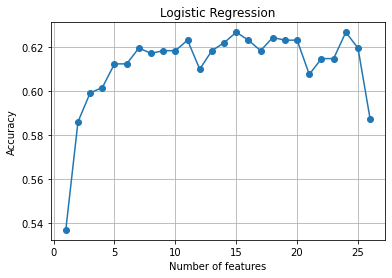

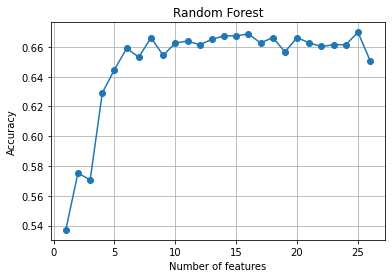

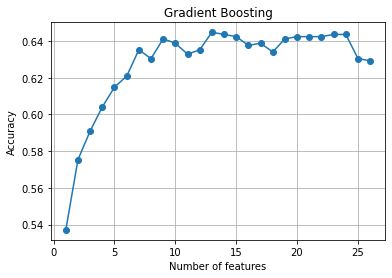

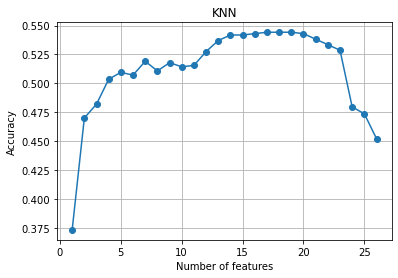

In [183]:
for label, clf in zip(clf_labels, all_clf):
    sbs[label] = SBS(clf,k_features=1)
    sbs[label].fit(X_train_form,y_train)
    k_feat[label] = [len(k) for k in sbs[label].subsets_]
    plt.plot(k_feat[label], sbs[label].scores_, marker='o')
    #plt.ylim([0.3, 1.02])
    plt.title(label)
    plt.ylabel('Accuracy')
    plt.xlabel('Number of features')
    plt.grid()
    plt.show()

In [184]:
lr_features = list(sbs['Logistic Regression'].subsets_[20])
for idx, i in enumerate(lr_features):
    print(idx,features[i]) 

0 Home_Possession
1 Away_Possession
2 Home_Shots_on_target
3 Away_Shots_on_target
4 Home_Total_Shots
5 Home_Clearance


In [185]:
rf_features = list(sbs['Random Forest'].subsets_[13])
for idx, i in enumerate(rf_features):
    print(idx,features[i]) 

0 Home_Shots_on_target
1 Away_Shots_on_target
2 Away_Total_Shots
3 Away_Touches
4 Away_Pasees
5 Home_Takles
6 Away_Takles
7 Home_Clearance
8 Away_Clearance
9 Away_Corners
10 Home_Offsides
11 Away_Offsides
12 Away_Red_Cards


In [186]:
gb_features = list(sbs['Gradient Boosting'].subsets_[18])
for idx, i in enumerate(gb_features):
    print(idx,features[i]) 

0 Away_Possession
1 Home_Shots_on_target
2 Away_Shots_on_target
3 Home_Touches
4 Away_Clearance
5 Home_Yellow_Cards
6 Home_Red_Cards
7 Away_Red_Cards


In [187]:
knn_features = list(sbs['KNN'].subsets_[24])
for idx, i in enumerate(knn_features):
    print(idx,features[i]) 

0 Home_Possession
1 Away_Clearance


In [188]:
for clf in clfs:
    clf.fit(X_train_form, y_train_form)
    print(type(clf))
    print("score = ", clf.score(X_test_form, y_test_form), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.6435406698564593 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.6866028708133971 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.6519138755980861 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.4868421052631579 



In [189]:
lr.fit(X_train_form[:, lr_features], y_train_form)
print('Train accuracy:', lr.score(X_train_form[:, lr_features], y_train_form))
print('Test accuracy:', lr.score(X_test_form[:, lr_features], y_test_form))

Train accuracy: 0.6045468142387077
Test accuracy: 0.6196172248803827


A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [190]:
rf.fit(X_train_form[:, rf_features], y_train_form)

print('Train accuracy:', rf.score(X_train_form[:, rf_features], y_train_form))

print('Test accuracy:', rf.score(X_test_form[:, rf_features], y_test_form))

Train accuracy: 1.0
Test accuracy: 0.6830143540669856


In [191]:
gb.fit(X_train_form[:, gb_features], y_train_form)
print('Train accuracy:', gb.score(X_train_form[:, gb_features], y_train_form))
print('Test accuracy:', gb.score(X_test_form[:, gb_features], y_test_form))

Train accuracy: 0.7032605444211786
Test accuracy: 0.6303827751196173


In [192]:
knn.fit(X_train_form[:, knn_features], y_train_form)
print('Train accuracy:', knn.score(X_train_form[:, knn_features], y_train_form))
print('Test accuracy:', knn.score(X_test_form[:, knn_features], y_test_form))

Train accuracy: 0.6404427161232426
Test accuracy: 0.44976076555023925


In [193]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train_form_std)
X_test_pca = pca.transform(X_test_form_std)
pca.explained_variance_ratio_

array([2.62959070e-01, 8.60400630e-02, 5.45115322e-02, 5.13699807e-02,
       4.83472975e-02, 4.54280365e-02, 4.26287759e-02, 4.18591738e-02,
       3.95419061e-02, 3.84474335e-02, 3.75556976e-02, 3.74353123e-02,
       3.62408652e-02, 3.31561308e-02, 2.74918567e-02, 2.50212241e-02,
       2.07158597e-02, 1.97258853e-02, 1.59115608e-02, 1.46509725e-02,
       1.04358730e-02, 9.74742442e-03, 7.78068535e-04, 2.06689081e-33,
       2.06689081e-33, 1.92976751e-33])

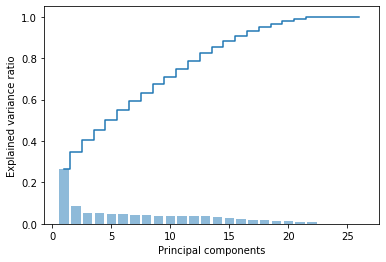

In [194]:
plt.bar(range(1, 27), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 27), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [195]:
pca = PCA(n_components = 12)

X_train_pca = pca.fit_transform(X_train_form_std)
X_test_pca = pca.transform(X_test_form_std)

for clf in clfs:
    clf.fit(X_train_pca, y_train_form)
    print(type(clf))
    print("score = ", clf.score(X_test_pca, y_test_form), "\n")
    
    

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.5813397129186603 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.6339712918660287 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.583732057416268 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.5490430622009569 



In [196]:
lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train_form, y_train_form)
X_test_lda = lda.transform(X_test_form)

for clf in clfs:
    clf.fit(X_train_lda, y_train_form)
    print(type(clf))
    print("score = ", clf.score(X_test_lda, y_test_form), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.65311004784689 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.6507177033492823 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.6483253588516746 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.6160287081339713 



In [197]:
kpca = KernelPCA(n_components=5, kernel='rbf', gamma=15)

X_train_kpca = kpca.fit_transform(X_train_form)
X_test_kpca = kpca.transform(X_test_form)

for clf in clfs:
    clf.fit(X_train_kpca, y_train_form)
    print(type(clf))
    print("score = ", clf.score(X_test_kpca, y_test_form), "\n")

<class 'sklearn.linear_model._logistic.LogisticRegression'>
score =  0.4677033492822967 

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
score =  0.4677033492822967 

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
score =  0.4677033492822967 

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
score =  0.2631578947368421 



In [198]:
for label, clf in zip(clf_labels, all_clf):
    scores = cross_val_score(estimator=clf, X = X_train_form, y = y_train_form, cv = 10, scoring = 'accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Accuracy: 0.60 (+/- 0.02) [Logistic Regression]
Accuracy: 0.68 (+/- 0.02) [Random Forest]
Accuracy: 0.64 (+/- 0.03) [Gradient Boosting]
Accuracy: 0.49 (+/- 0.02) [KNN]


In [199]:
eclf = VotingClassifier(estimators=[('lr',lr), ('rf',rf), ('gb',gb), ('knn',knn)], voting='hard')

scores = cross_val_score(estimator=eclf, X=X_train_form, y = y_train_form, cv= 10, scoring = 'accuracy')
# scores = eclf.score(X=X_train_form, y=y_train_form)
print("Accuracy: %0.2f (+/- %0.2f)"  % (scores.mean(), scores.std()))

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Accuracy: 0.66 (+/- 0.03)


In [200]:
eclf.fit(X_train_form,y_train_form)

y_pred_eclf = eclf.predict(X_test_form)

print("Accuracy score = ", accuracy_score(y_pred_eclf,y_test_form))

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score =  0.65311004784689


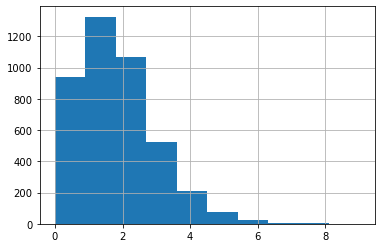

In [201]:
hometeam_eg = df['Hometeam Score'].hist()
hometeam_eg

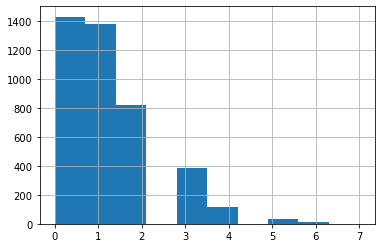

In [202]:
awayteam_eg = df['Awayteam Score'].hist()
awayteam_eg

In [203]:
df

Match_ID                 Hometeam                  Awayteam  \
0        6697                  Arsenal                Stoke City   
1        6698              Aston Villa          Newcastle United   
2        6699         Blackburn Rovers      West Bromwich Albion   
3        6700                   Fulham                   Everton   
4        6701                Hull City         Manchester United   
..        ...                      ...                       ...   
375     38310                   Fulham            Crystal Palace   
376     38311        Huddersfield Town                   Chelsea   
377     38316                  Watford  Brighton and Hove Albion   
378     38317  Wolverhampton Wanderers                   Everton   
379     38313        Manchester United            Leicester City   

     Hometeam Score  Awayteam Score  Home_Possession  Away_Possession  \
0                 4               1             70.8             29.2   
1                 1               0             52.8             47.2   
2                 0               0             48.8             51.2   
3                 0               2             50.4             49.6   
4                 0               1             34.9             65.1   
..              ...             ...              ...              ...   
375               0               2             66.3             33.7   
376               0               3             37.2             62.8   
377               2               0             53.2             46.8   
378               2               2             57.4             42.6   
379               2               1             46.3             53.7   

     Home_Shots_on_target  Away_Shots_on_target  Home_Total_Shots  ...  \
0                       9                     2                26  ...   
1                       2                     4                14  ...   
2                       1                     2                10  ...   
3                       4                    10                15  ...   
4                       8                     4                14  ...   
..                    ...                   ...               ...  ...   
375                     6                    10                15  ...   
376                     1                     4                 6  ...   
377                     5                     0                19  ...   
378                     4                     5                11  ...   
379                     6                     4                 8  ...   

     Home_Offsides  Away_Offsides  Home_Yellow_Cards  Away_Yellow_Cards  \
0                0              1                  1                  0   
1                3              0                  0                  1   
2                3              3                  0                  1   
3                2              5                  0                  0   
4                3              0                  2                  1   
..             ...            ...                ...                ...   
375              2              3                  1                  2   
376              2              1                  2                  1   
377              0              3                  2                  2   
378              2              3                  0                  1   
379              4              2                  2                  1   

     Home_Red_Cards  Away_Red_Cards  Home_Fouls_Conceded  Away_Fouls_Conceded  \
0                 0               0                   10                   11   
1                 0               1                    9                   10   
2                 1               0                   14                   11   
3                 0               0                   16                   12   
4                 0               0                   17                   12   
..              ...             ...

In [204]:
df.drop(columns = features_to_drop, inplace = True)
print(list(df))

['Match_ID', 'Hometeam', 'Awayteam', 'Hometeam Score', 'Awayteam Score', 'Home_Shots_on_target', 'Away_Shots_on_target', 'Home_Passes', 'Away_Pasees', 'Home_Clearance', 'Away_Clearance', 'Home_Offsides', 'Away_Offsides', 'Home_Fouls_Conceded', 'Away_Fouls_Conceded', 'Year', 'target']


In [205]:
home_attributes = ['Match_ID', 'Year'] + [a for a in list(df) if 'Home' in a]
away_attributes = ['Match_ID', 'Year'] + [a for a in list(df) if 'Away' in a]

print(home_attributes, '\n')
print(away_attributes)

['Match_ID', 'Year', 'Hometeam', 'Hometeam Score', 'Home_Shots_on_target', 'Home_Passes', 'Home_Clearance', 'Home_Offsides', 'Home_Fouls_Conceded'] 

['Match_ID', 'Year', 'Awayteam', 'Awayteam Score', 'Away_Shots_on_target', 'Away_Pasees', 'Away_Clearance', 'Away_Offsides', 'Away_Fouls_Conceded']


In [206]:
melted = []
for _, row in df.iterrows():
    home_team = [row[attr] for attr in away_attributes] + [1]
    away_team = [row[attr] for attr in home_attributes] + [0]
    melted.append(home_team)
    melted.append(away_team)

print(melted[1])

[6697, 2008, 'Arsenal', 4, 9, 663, 14, 0, 10, 0]


In [207]:
features = ['Match_ID', 'Year'] + [a for a in list(df) if 'Home' in a] + ['IsHome']
print(features)

['Match_ID', 'Year', 'Hometeam', 'Hometeam Score', 'Home_Shots_on_target', 'Home_Passes', 'Home_Clearance', 'Home_Offsides', 'Home_Fouls_Conceded', 'IsHome']


In [208]:
melted_df = pd.DataFrame(melted, columns = features)
melted_df=melted_df.rename(columns={'Match_ID': 'MatchID', 'Hometeam':'Team', 'Hometeam Score': 'Score', 'Home_Shots_on_target': 'Shots',
                         'Home_Passes': 'Pases', 'Home_Clearance': 'Clearances', 'Home_Offsides':'Offsides',
                         'Home_Fouls_Conceded':'Fouls'})
melted_df

MatchID  Year                     Team  Score  Shots  Pases  Clearances  \
0        6697  2008               Stoke City      1      2    258          34   
1        6697  2008                  Arsenal      4      9    663          14   
2        6698  2008         Newcastle United      0      4    346          31   
3        6698  2008              Aston Villa      1      2    381          56   
4        6699  2008     West Bromwich Albion      0      2    337          30   
...       ...   ...                      ...    ...    ...    ...         ...   
8353    38316  2018                  Watford      2      5    437          11   
8354    38317  2018                  Everton      2      5    409          28   
8355    38317  2018  Wolverhampton Wanderers      2      4    547          23   
8356    38313  2018           Leicester City      1      4    543          14   
8357    38313  2018        Manchester United      2      6    485          37   

      Offsides  Fouls  IsHome  
0            1     11       1  
1            0     10       0  
2            0     10       1  
3            3      9       0  
4            3     11       1  
...        ...    ...     ...  
8353         0     10       0  
8354         3      7       1  
8355         2      8       0  
8356         2      8       1  
8357         4     11       0  

[8358 rows x 10 columns]

In [209]:
from sklearn.linear_model import Lasso, Ridge, BayesianRidge, LinearRegression
regression_clfs = [LogisticRegression(), RandomForestClassifier(), 
                   Lasso(), Ridge(), BayesianRidge(), LinearRegression()]

In [210]:
scaler = StandardScaler()
# drop variables that are proxies for target
melted_df_wo = melted_df.drop(columns = ['MatchID', 'Team', 'Year'])
print(list(melted_df_wo))

X = melted_df_wo.values
X_scaled = scaler.fit_transform(X)
y = melted_df['Score'].values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .2, random_state = 42)

melted_df

['Score', 'Shots', 'Pases', 'Clearances', 'Offsides', 'Fouls', 'IsHome']


MatchID  Year                     Team  Score  Shots  Pases  Clearances  \
0        6697  2008               Stoke City      1      2    258          34   
1        6697  2008                  Arsenal      4      9    663          14   
2        6698  2008         Newcastle United      0      4    346          31   
3        6698  2008              Aston Villa      1      2    381          56   
4        6699  2008     West Bromwich Albion      0      2    337          30   
...       ...   ...                      ...    ...    ...    ...         ...   
8353    38316  2018                  Watford      2      5    437          11   
8354    38317  2018                  Everton      2      5    409          28   
8355    38317  2018  Wolverhampton Wanderers      2      4    547          23   
8356    38313  2018           Leicester City      1      4    543          14   
8357    38313  2018        Manchester United      2      6    485          37   

      Offsides  Fouls  IsHome  
0            1     11       1  
1            0     10       0  
2            0     10       1  
3            3      9       0  
4            3     11       1  
...        ...    ...     ...  
8353         0     10       0  
8354         3      7       1  
8355         2      8       0  
8356         2      8       1  
8357         4     11       0  

[8358 rows x 10 columns]

In [211]:
# # list(melted_df)
# melted_df=melted_df.drop(columns=['Hometeam'])
# melted_df=melted_df.rename(columns={'Match_ID': 'MatchID', 'Hometeam Score': 'Score', 'Home_Shots_on_target': 'Shots',
#                          'Home_Passes': 'Pases', 'Home_Clearance': 'Clearances', 'Home_Offsides':'Offsides',
#                          'Home_Fouls_Conceded':'Fouls'})

# list(melted_df)


In [212]:
from sklearn.metrics import mean_squared_error

for clf in regression_clfs:
    clf.fit(X_train, y_train)
    print(str(type(clf)).split(".")[-1][:-2])
    y_pred = clf.predict(X_test)
    print("rmse = ", mean_squared_error(y_test, y_pred) ** .5)

A:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
rmse =  0.12227899701112963
RandomForestClassifier
rmse =  0.08111071056538127
Lasso
rmse =  0.9901413263691059
Ridge
rmse =  0.00023333148700792342
BayesianRidge
rmse =  2.6380121555280506e-13
LinearRegression
rmse =  5.444202026378677e-15


In [213]:
WINDOW = 10
max(melted_df.Year)

2018

In [214]:
unique_teams = melted_df[melted_df.Year == 2018].Team.unique()
unique_teams

array(['Manchester City', 'Brighton and Hove Albion', 'Arsenal',
       'Burnley', 'AFC Bournemouth', 'Crystal Palace', 'Newcastle United',
       'Fulham', 'Chelsea', 'Leicester City', 'Wolverhampton Wanderers',
       'Liverpool', 'Cardiff City', 'Manchester United',
       'Huddersfield Town', 'Southampton', 'Everton', 'Tottenham Hotspur',
       'West Ham United', 'Watford'], dtype=object)

In [215]:
#expected goals model
def build_exp_goals(df, clf):
    X = df[df.Year < 2018].drop(columns = ['MatchID', 'Team', 'Year', 'Score']).values
    y = df[df.Year < 2018].Score.values
    clf.fit(X, y)
    return clf

In [216]:
goal_model = build_exp_goals(melted_df, BayesianRidge())

In [217]:
def build_stat_model(df, clf, feature = 'Score'):
    teams = df[df.Year == 2018].Team.unique()
    X_as_list = []
    y_as_list = []
    for team in teams:
        team_df = df[df.Team == team]
        fit_df = team_df[team_df.Year != 2018].drop(columns = ['MatchID', 'Team', 'Year', feature])
        for i in range(0, team_df.shape[0] - WINDOW - 1):
            X_vec = fit_df.iloc[i:i + WINDOW].values.flatten()
            print(X_vec.shape)
            if X_vec.shape[0] == 60:  # must have ten games of 7 features
                # TODO: need to add indicator of current game isHome
                X_as_list.append(X_vec) 
                y_as_list.append(team_df[feature].values[i + WINDOW + 1])    
    print(X_as_list)
    # convert to vectors for model input
    X = np.vstack(X_as_list)
    y = np.array(y_as_list)
    clf.fit(X, y)
    return clf
melted_df[melted_df.Year == 2017]

MatchID  Year                      Team  Score  Shots  Pases  \
6838    22712  2017           AFC Bournemouth      2      5    401   
6839    22712  2017                   Burnley      1      4    416   
6840    22713  2017      West Bromwich Albion      0      1    379   
6841    22713  2017            Crystal Palace      2      5    560   
6842    22714  2017                   Arsenal      1      4    519   
...       ...   ...                       ...    ...    ...    ...   
7593    22351  2017      West Bromwich Albion      1      6    242   
7594    22343  2017           Manchester City      2      4    768   
7595    22343  2017  Brighton and Hove Albion      0      2    213   
7596    22342  2017            Leicester City      3      3    263   
7597    22342  2017                   Arsenal      4     10    632   

      Clearances  Offsides  Fouls  IsHome  
6838          33         1      9       1  
6839          17         3     14       0  
6840          14         1     11       1  
6841          18         1     10       0  
6842          36         2      7       1  
...          ...       ...    ...     ...  
7593          26         2     15       0  
7594           8         1      9       1  
7595          39         6      6       0  
7596          24         3     12       1  
7597          30         5      9       0  

[760 rows x 10 columns]

In [218]:
model_map = {'Shots': LinearRegression(),
             'Pases': Ridge(),
             'Clearances': GradientBoostingRegressor(),
             'Offsides': Ridge(),
             'Fouls': GradientBoostingRegressor()}

for feature, clf in model_map.items():
    model_map[feature] = build_stat_model(melted_df, clf, feature)

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(6

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(6

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)


(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)


[array([  1,  11, 428,   3,   9,   0,   1,   4, 423,   2,   8,   1,   0,
         2, 475,   2,  14,   1,   3,   3, 436,   1,  11,   0,   2,   8,
       366,   3,  15,   1,   4,   9, 352,   2,  19,   0,   1,   5, 482,
         2,  10,   0,   0,   4, 361,   0,  10,   1,   1,   9, 488,   2,
        17,   0,   0,   1, 401,   2,   9,   1], dtype=int64), array([  1,   4, 423,   2,   8,   1,   0,   2, 475,   2,  14,   1,   3,
         3, 436,   1,  11,   0,   2,   8, 366,   3,  15,   1,   4,   9,
       352,   2,  19,   0,   1,   5, 482,   2,  10,   0,   0,   4, 361,
         0,  10,   1,   1,   9, 488,   2,  17,   0,   0,   1, 401,   2,
         9,   1,   2,   4, 346,   2,   9,   0], dtype=int64), array([  0,   2, 475,   2,  14,   1,   3,   3, 436,   1,  11,   0,   2,
         8, 366,   3,  15,   1,   4,   9, 352,   2,  19,   0,   1,   5,
       482,   2,  10,   0,   0,   4, 361,   0,  10,   1,   1,   9, 488,
         2,  17,   0,   0,   1, 401,   2,   9,   1,   2,   4, 346,   2,
         9,

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)


(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(6

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(54,)
(48,)
(42,)
(36,)
(30,)
(24,)
(18,)
(12,)
(6,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(6

(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,)
(60,

In [219]:
st_dev_map = { feature: np.std(melted_df[feature]) for feature in model_map.keys()}
# np.std(melted_df['Shots'])
print(st_dev_map)

{'Shots': 2.523062088850592, 'Pases': 115.60383264415253, 'Clearances': 12.767174576903408, 'Offsides': 1.7350829916178976, 'Fouls': 3.6547072208164684}


In [233]:
import random

def fit_game(game, df, clf_map, goal_model):
    # there is one caveat here, given relegation we need to proxy the newly promoted teams
    # of ['Brighton', 'Huddersfield', 'Newcastle']
    # with ones relegated in 2017 => ['Hull', 'Middlesbrough', 'Sunderland']
    relegated = ['Hull', 'Middlesbrough', 'Sunderland']

    # find team's previous results pull out last 10 games and vectorize
    team_df = df[df.Team == game.Team]
#     print("+++++++++")
#     print(team_df)
#     print("+++++++++")
    if team_df.shape[0] < 10: # newly promoted team at beginning of simulation
        relegated_df = df[(df.Team == relegated[0]) | (df.Team == relegated[1]) | (df.Team == relegated[2])]
#         print("************")
#         print(relegated_df)
#         print("************")
        team_df = pd.concat([relegated_df, team_df])
        
    
    new_row = {'MatchID': game.MatchID, 'Team': game.Team, 'Year': game.Year, 'Score': None, 'Shots': None, 
               'Pases': None, 'Clearances': None, 'Offsides': None, 'Fouls': None,
                'IsHome': game.IsHome}
#     print(new_row)
    for feature in clf_map.keys():
        X = team_df.tail(WINDOW).drop(columns = ['MatchID', 'Team', 'Year', feature]).values.flatten().reshape(1,-1)
        # add randomness feature (i.e. sample from the confidence interval)
        random_noise = st_dev_map[feature] * np.random.normal()
        new_row[feature] = max(int(clf_map[feature].predict(X)[0] + random_noise), 0)
#     print("=======")
#     print(new_row)
#     print(feature)

    goal_features = ['Shots', 'Pases', 'Clearances', 'Offsides', 'Fouls', 'IsHome']
    X_score_as_list = [ new_row[feature] for feature in goal_features ]
#     print(X_score_as_list)
    
    # calculate expected goals
    X_score = np.array(X_score_as_list).reshape(1, -1)
    new_row['Score'] = int(goal_model.predict(X_score)[0])
    return new_row

In [234]:
season_df = melted_df[melted_df.Year == 2018].drop(columns = list(model_map.keys()) + ['Score'])
season_df.head()
# melted_df[melted_df.Team == 'Aston'].MatchID.unique()
# melted_df

MatchID  Year                      Team  IsHome
7598    38678  2018           Manchester City       1
7599    38678  2018  Brighton and Hove Albion       0
7600    38679  2018                   Arsenal       1
7601    38679  2018                   Burnley       0
7602    38680  2018           AFC Bournemouth       1

In [236]:
# now we'll use this dataframe to generate all the results
for row in season_df.iterrows():
    game = row[1]
    print(game)
    simulated_result = fit_game(game, melted_df, model_map, goal_model)
    simulated_df = melted_df.append(simulated_result, ignore_index = True)
    
print(melted_df.tail())


MatchID              38678
Year                  2018
Team       Manchester City
IsHome                   1
Name: 7598, dtype: object
MatchID                       38678
Year                           2018
Team       Brighton and Hove Albion
IsHome                            0
Name: 7599, dtype: object
MatchID      38679
Year          2018
Team       Arsenal
IsHome           1
Name: 7600, dtype: object
MatchID      38679
Year          2018
Team       Burnley
IsHome           0
Name: 7601, dtype: object
MatchID              38680
Year                  2018
Team       AFC Bournemouth
IsHome                   1
Name: 7602, dtype: object
MatchID             38680
Year                 2018
Team       Crystal Palace
IsHome                  0
Name: 7603, dtype: object
MatchID               38681
Year                   2018
Team       Newcastle United
IsHome                    1
Name: 7604, dtype: object
MatchID     38681
Year         2018
Team       Fulham
IsHome          0
Name: 7605, dtype:

Name: 7666, dtype: object
MatchID      38651
Year          2018
Team       Chelsea
IsHome           0
Name: 7667, dtype: object
MatchID                38652
Year                    2018
Team       Manchester United
IsHome                     1
Name: 7668, dtype: object
MatchID      38652
Year          2018
Team       Everton
IsHome           0
Name: 7669, dtype: object
MatchID             38648
Year                 2018
Team       Crystal Palace
IsHome                  1
Name: 7670, dtype: object
MatchID      38648
Year          2018
Team       Arsenal
IsHome           0
Name: 7671, dtype: object
MatchID        38650
Year            2018
Team       Liverpool
IsHome             1
Name: 7672, dtype: object
MatchID           38650
Year               2018
Team       Cardiff City
IsHome                0
Name: 7673, dtype: object
MatchID     38649
Year         2018
Team       Fulham
IsHome          1
Name: 7674, dtype: object
MatchID              38649
Year                  2018
Team       A

Name: 7737, dtype: object
MatchID          38619
Year              2018
Team       Southampton
IsHome               1
Name: 7738, dtype: object
MatchID                       38619
Year                           2018
Team       Brighton and Hove Albion
IsHome                            0
Name: 7739, dtype: object
MatchID                      38620
Year                          2018
Team       Wolverhampton Wanderers
IsHome                           1
Name: 7740, dtype: object
MatchID      38620
Year          2018
Team       Burnley
IsHome           0
Name: 7741, dtype: object
MatchID                38622
Year                    2018
Team       Huddersfield Town
IsHome                     1
Name: 7742, dtype: object
MatchID             38622
Year                 2018
Team       Crystal Palace
IsHome                  0
Name: 7743, dtype: object
MatchID              38624
Year                  2018
Team       AFC Bournemouth
IsHome                   1
Name: 7744, dtype: object
MatchID     

MatchID                38583
Year                    2018
Team       Tottenham Hotspur
IsHome                     1
Name: 7804, dtype: object
MatchID      38583
Year          2018
Team       Chelsea
IsHome           0
Name: 7805, dtype: object
MatchID                38580
Year                    2018
Team       Manchester United
IsHome                     1
Name: 7806, dtype: object
MatchID             38580
Year                 2018
Team       Crystal Palace
IsHome                  0
Name: 7807, dtype: object
MatchID      38584
Year          2018
Team       Watford
IsHome           1
Name: 7808, dtype: object
MatchID        38584
Year            2018
Team       Liverpool
IsHome             0
Name: 7809, dtype: object
MatchID              38585
Year                  2018
Team       West Ham United
IsHome                   1
Name: 7810, dtype: object
MatchID              38585
Year                  2018
Team       Manchester City
IsHome                   0
Name: 7811, dtype: object
Matc

Name: 7869, dtype: object
MatchID                38551
Year                    2018
Team       Huddersfield Town
IsHome                     1
Name: 7870, dtype: object
MatchID      38551
Year          2018
Team       Chelsea
IsHome           0
Name: 7871, dtype: object
MatchID     38552
Year         2018
Team       Fulham
IsHome          1
Name: 7872, dtype: object
MatchID             38552
Year                 2018
Team       Crystal Palace
IsHome                  0
Name: 7873, dtype: object
MatchID                      38553
Year                          2018
Team       Wolverhampton Wanderers
IsHome                           1
Name: 7874, dtype: object
MatchID      38553
Year          2018
Team       Everton
IsHome           0
Name: 7875, dtype: object
MatchID              38550
Year                  2018
Team       AFC Bournemouth
IsHome                   1
Name: 7876, dtype: object
MatchID           38550
Year               2018
Team       Cardiff City
IsHome                0
Name

Name: 7940, dtype: object
MatchID              38509
Year                  2018
Team       AFC Bournemouth
IsHome                   0
Name: 7941, dtype: object
MatchID          38511
Year              2018
Team       Southampton
IsHome               1
Name: 7942, dtype: object
MatchID      38511
Year          2018
Team       Chelsea
IsHome           0
Name: 7943, dtype: object
MatchID      38513
Year          2018
Team       Burnley
IsHome           1
Name: 7944, dtype: object
MatchID                38513
Year                    2018
Team       Huddersfield Town
IsHome                     0
Name: 7945, dtype: object
MatchID                       38516
Year                           2018
Team       Brighton and Hove Albion
IsHome                            1
Name: 7946, dtype: object
MatchID              38516
Year                  2018
Team       West Ham United
IsHome                   0
Name: 7947, dtype: object
MatchID             38517
Year                 2018
Team       Crystal P

Name: 8005, dtype: object
MatchID          38483
Year              2018
Team       Southampton
IsHome               1
Name: 8006, dtype: object
MatchID                38483
Year                    2018
Team       Huddersfield Town
IsHome                     0
Name: 8007, dtype: object
MatchID             38484
Year                 2018
Team       Crystal Palace
IsHome                  1
Name: 8008, dtype: object
MatchID              38484
Year                  2018
Team       Manchester City
IsHome                   0
Name: 8009, dtype: object
MatchID     38485
Year         2018
Team       Fulham
IsHome          1
Name: 8010, dtype: object
MatchID               38485
Year                   2018
Team       Newcastle United
IsHome                    0
Name: 8011, dtype: object
MatchID      38486
Year          2018
Team       Watford
IsHome           1
Name: 8012, dtype: object
MatchID              38486
Year                  2018
Team       West Ham United
IsHome                   0
Name

MatchID      38453
Year          2018
Team       Watford
IsHome           0
Name: 8077, dtype: object
MatchID     38440
Year         2018
Team       Fulham
IsHome          1
Name: 8078, dtype: object
MatchID      38440
Year          2018
Team       Chelsea
IsHome           0
Name: 8079, dtype: object
MatchID                38438
Year                    2018
Team       Tottenham Hotspur
IsHome                     1
Name: 8080, dtype: object
MatchID      38438
Year          2018
Team       Arsenal
IsHome           0
Name: 8081, dtype: object
MatchID      38444
Year          2018
Team       Everton
IsHome           1
Name: 8082, dtype: object
MatchID        38444
Year            2018
Team       Liverpool
IsHome             0
Name: 8083, dtype: object
MatchID      38441
Year          2018
Team       Burnley
IsHome           1
Name: 8084, dtype: object
MatchID             38441
Year                 2018
Team       Crystal Palace
IsHome                  0
Name: 8085, dtype: object
MatchID   

Name: 8145, dtype: object
MatchID             38410
Year                 2018
Team       Leicester City
IsHome                  1
Name: 8146, dtype: object
MatchID           38410
Year               2018
Team       Cardiff City
IsHome                0
Name: 8147, dtype: object
MatchID                       38412
Year                           2018
Team       Brighton and Hove Albion
IsHome                            1
Name: 8148, dtype: object
MatchID      38412
Year          2018
Team       Everton
IsHome           0
Name: 8149, dtype: object
MatchID      38415
Year          2018
Team       Watford
IsHome           1
Name: 8150, dtype: object
MatchID               38415
Year                   2018
Team       Newcastle United
IsHome                    0
Name: 8151, dtype: object
MatchID      38416
Year          2018
Team       Burnley
IsHome           1
Name: 8152, dtype: object
MatchID              38416
Year                  2018
Team       West Ham United
IsHome                   0


MatchID             38369
Year                 2018
Team       Crystal Palace
IsHome                  1
Name: 8218, dtype: object
MatchID              38369
Year                  2018
Team       AFC Bournemouth
IsHome                   0
Name: 8219, dtype: object
MatchID      38370
Year          2018
Team       Burnley
IsHome           1
Name: 8220, dtype: object
MatchID           38370
Year               2018
Team       Cardiff City
IsHome                0
Name: 8221, dtype: object
MatchID                38376
Year                    2018
Team       Manchester United
IsHome                     1
Name: 8222, dtype: object
MatchID              38376
Year                  2018
Team       West Ham United
IsHome                   0
Name: 8223, dtype: object
MatchID      38368
Year          2018
Team       Watford
IsHome           1
Name: 8224, dtype: object
MatchID      38368
Year          2018
Team       Arsenal
IsHome           0
Name: 8225, dtype: object
MatchID     38372
Year         2

Name: 8296, dtype: object
MatchID              38345
Year                  2018
Team       Manchester City
IsHome                   0
Name: 8297, dtype: object
MatchID                38333
Year                    2018
Team       Tottenham Hotspur
IsHome                     1
Name: 8298, dtype: object
MatchID                38333
Year                    2018
Team       Manchester United
IsHome                     0
Name: 8299, dtype: object
MatchID             38336
Year                 2018
Team       Crystal Palace
IsHome                  1
Name: 8300, dtype: object
MatchID      38336
Year          2018
Team       Watford
IsHome           0
Name: 8301, dtype: object
MatchID      38330
Year          2018
Team       Burnley
IsHome           1
Name: 8302, dtype: object
MatchID     38330
Year         2018
Team       Fulham
IsHome          0
Name: 8303, dtype: object
MatchID      38334
Year          2018
Team       Chelsea
IsHome           1
Name: 8304, dtype: object
MatchID               

In [237]:
def get_team_points(df):
    year_df = df[df.Year == 2018]
    point_dict = { team: [] for team in year_df.Team.unique() } 
    match_ids = year_df.MatchID.unique()
    for match_id in match_ids:
        game = year_df[year_df.MatchID == match_id]
        result = game[['Team', 'Score']].values
        if result[0][1] == result[1][1]:
            point_dict[result[0][0]].append(1)
            point_dict[result[1][0]].append(1)
        elif result[0][1] > result[1][1]:
            point_dict[result[0][0]].append(3)
            point_dict[result[1][0]].append(0)            
        else:
            point_dict[result[0][0]].append(0)
            point_dict[result[1][0]].append(3)
            
    table = []
    for team, point_list in point_dict.items():
        table.append( (team, sum(point_list)) )
    return table

In [238]:
points = get_team_points(simulated_df)
sorted( points, key = lambda x: -x[1])

[('Manchester City', 98),
 ('Liverpool', 97),
 ('Chelsea', 72),
 ('Tottenham Hotspur', 71),
 ('Arsenal', 70),
 ('Manchester United', 66),
 ('Wolverhampton Wanderers', 57),
 ('Everton', 54),
 ('Leicester City', 52),
 ('West Ham United', 52),
 ('Watford', 50),
 ('Crystal Palace', 49),
 ('AFC Bournemouth', 45),
 ('Newcastle United', 45),
 ('Burnley', 40),
 ('Southampton', 39),
 ('Brighton and Hove Albion', 36),
 ('Cardiff City', 34),
 ('Fulham', 26),
 ('Huddersfield Town', 16)]

In [239]:
# def run_simulations(df,test_df, runs, model_map, goal_model):
#     season_df = df.drop(columns = list(model_map.keys()) + ['Score'])
#     base_df = test_df
#     season_point_totals = { team: [] for team in season_df.Team.unique() } # list of simulation results
#     print("********")
#     print(season_df)
#     print("********")
    
#     print("$$$$$$$$")
#     print(base_df)
#     print("$$$$$$$$")
#     for run in range(runs):
#         # reset simulation_df
#         run_df = base_df.copy()
#         print("---------")
#         print(run_df)
#         print("---------")
#         # run_simulation
#         for row in season_df.iterrows():
#             game = row[1]
#             print(game)
#             simulated_result = fit_game(game, run_df, model_map, goal_model)
#             run_df = run_df.append(simulated_result, ignore_index = True)
    
#         # add season result to simulation results
#         simulated_table = get_team_points(run_df)
#         for points in simulated_table:
#             season_point_totals[points[0]].append(points[1])
        
#     return [ (team, sum(point_totals)/len(point_totals)) for team, point_totals in season_point_totals.items() ]

def run_simulations(df, runs, model_map, goal_model):
    season_df = df[df.Year == 2018].drop(columns = list(model_map.keys()) + ['Score'])
    base_df = df[df.Year == 2013]
    season_point_totals = { team: [] for team in season_df.Team.unique() } # list of simulation results
    
    for run in range(runs):
        
        # reset simulation_df
        run_df = base_df.copy()
    
        # run_simulation
        for row in season_df.iterrows():
            game = row[1]
            simulated_result = fit_game(game, run_df, model_map, goal_model)
            run_df = run_df.append(simulated_result, ignore_index = True)
    
        # add season result to simulation results
        simulated_table = get_team_points(run_df)
        for points in simulated_table:
            season_point_totals[points[0]].append(points[1])
        
    return [ (team, sum(point_totals)/len(point_totals)) for team, point_totals in season_point_totals.items() ]

In [240]:
melted_df[melted_df.Team == 'Fulham']
# melted_df.head(10)

MatchID  Year    Team  Score  Shots  Pases  Clearances  Offsides  Fouls  \
7        6700  2008  Fulham      0      4    423          28         2     16   
34       6691  2008  Fulham      1      3    414          64         3     18   
55       6679  2008  Fulham      3      9    415          42         0     12   
68       6666  2008  Fulham      1      2    438          29         0      7   
93       6658  2008  Fulham      1      2    501          54         1      9   
...       ...   ...     ...    ...    ...    ...         ...       ...    ...   
8272    38352  2018  Fulham      0      3    400          22         2      7   
8286    38338  2018  Fulham      2      5    551          26         4     14   
8303    38330  2018  Fulham      4     12    572          25         1     11   
8332    38326  2018  Fulham      1      3    435          39         3      5   
8349    38310  2018  Fulham      0      6    672          22         2      9   

      IsHome  
7          0  
34         1  
55         0  
68         1  
93         0  
...      ...  
8272       1  
8286       1  
8303       0  
8332       1  
8349       0  

[266 rows x 10 columns]

In [243]:
RUNS = 20

print(unique_teams)
avg_table = run_simulations(melted_df, RUNS, model_map, goal_model)

sim_output = sorted(avg_table, key = lambda x: -x[1])



['Manchester City' 'Brighton and Hove Albion' 'Arsenal' 'Burnley'
 'AFC Bournemouth' 'Crystal Palace' 'Newcastle United' 'Fulham' 'Chelsea'
 'Leicester City' 'Wolverhampton Wanderers' 'Liverpool' 'Cardiff City'
 'Manchester United' 'Huddersfield Town' 'Southampton' 'Everton'
 'Tottenham Hotspur' 'West Ham United' 'Watford']


In [246]:
print(sim_output)


[('Arsenal', 54.75), ('Manchester United', 54.65), ('Manchester City', 54.4), ('Chelsea', 54.0), ('Everton', 53.0), ('Southampton', 51.65), ('Liverpool', 51.15), ('Tottenham Hotspur', 51.1), ('Cardiff City', 50.25), ('Newcastle United', 49.25), ('Fulham', 49.0), ('AFC Bournemouth', 48.25), ('West Ham United', 47.4), ('Crystal Palace', 47.1), ('Brighton and Hove Albion', 46.75), ('Leicester City', 46.05), ('Wolverhampton Wanderers', 45.7), ('Watford', 45.15), ('Burnley', 42.55), ('Huddersfield Town', 41.3)]
Arsenal
Manchester United
Manchester City
Chelsea
Everton
Southampton
Liverpool
Tottenham Hotspur
Cardiff City
Newcastle United
Fulham
AFC Bournemouth
West Ham United
Crystal Palace
Brighton and Hove Albion
Leicester City
Wolverhampton Wanderers
Watford
Burnley
Huddersfield Town


In [249]:
def write_json_file(sim_list):
    table_dictionary = {}
    
    table_dictionary['Team'] = []
    for team in sim_list:
        table_dictionary['Team'].append(
        {
            'Team_name': team[0],
            'Points': team[1]
        }
        )
    
    with open('epl_prediction_table.json', 'w') as file:
        json.dump(table_dictionary, file)
write_json_file(sim_output)

In [228]:
data = pd.read_csv(os.getcwd() + '/Data/2016-17Season.csv')
data['Hometeam Goal Diff'] = data[['Hometeam Score', 'Awayteam Score']].apply(hometeam_gd, axis=1)
data['Awayteam Goal Diff'] = data[['Hometeam Score', 'Awayteam Score']].apply(awayteam_gd, axis=1)
data['target'] = data[['Hometeam Score', 'Awayteam Score']].apply(convert_score_to_numerical, axis=1)
df = pd.DataFrame(data)
df

Match_ID         Hometeam              Awayteam  Hometeam Score  \
0       14410          Arsenal               Everton               3   
1       14411          Burnley       West Ham United               1   
2       14412          Chelsea            Sunderland               5   
3       14413        Hull City     Tottenham Hotspur               1   
4       14414   Leicester City       AFC Bournemouth               1   
..        ...              ...                   ...             ...   
375     14044   Crystal Palace  West Bromwich Albion               0   
376     14045          Everton     Tottenham Hotspur               1   
377     14048    Middlesbrough            Stoke City               1   
378     14049      Southampton               Watford               1   
379     14047  Manchester City            Sunderland               2   

     Awayteam Score  Home_Possession  Away_Possession  Home_Shots_on_target  \
0                 1             49.5             50.5                     9   
1                 2             44.7             55.3                     1   
2                 1             70.5             29.5                     8   
3                 7             34.7             65.3                     4   
4                 1             48.6             51.4                     4   
..              ...              ...              ...                   ...   
375               1             62.3             37.7                     4   
376               1             42.5             57.5                     6   
377               1             45.6             54.4                     2   
378               1             64.3             35.7                     6   
379               1             76.9             23.1                     4   

     Away_Shots_on_target  Home_Total_Shots  ...  Away_Offsides  \
0                       7                17  ...              1   
1                       4                 9  ...              3   
2                       3                28  ...              1   
3                      14                10  ...              0   
4                       4                20  ...              1   
..                    ...               ...  ...            ...   
375                     3                14  ...              2   
376                     4                12  ...              0   
377                     1                12  ...              2   
378                     1                24  ...              0   
379                     3                16  ...              2   

     Home_Yellow_Cards  Away_Yellow_Cards  Home_Red_Cards  Away_Red_Cards  \
0                    2                  4               1               0   
1                    2                  2               0               0   
2                    1                  1               0               0   
3                    0                  0               0               0   
4                    4                  1               0               0   
..                 ...                ...             ...             ...   
375                  2                  2               0               0   
376                  0                  0               0               0   
377                  3                  5               0               0   
378                  1                  2               0               1   
379                  1                  2               0               0   

     Home_Fouls_Conceded  Away_Fouls_Conceded  Hometeam Goal Diff  \
0                     10                   15                   2   
1                     11                   14                  -1   
2                      8                   15                   4   
3                     14                    5                  -6   
4                     11                   10                   0   
..                   ...                  ...  

In [229]:
melted_df

MatchID  Year                     Team  Score  Shots  Pases  Clearances  \
0        6697  2008               Stoke City      1      2    258          34   
1        6697  2008                  Arsenal      4      9    663          14   
2        6698  2008         Newcastle United      0      4    346          31   
3        6698  2008              Aston Villa      1      2    381          56   
4        6699  2008     West Bromwich Albion      0      2    337          30   
...       ...   ...                      ...    ...    ...    ...         ...   
8353    38316  2018                  Watford      2      5    437          11   
8354    38317  2018                  Everton      2      5    409          28   
8355    38317  2018  Wolverhampton Wanderers      2      4    547          23   
8356    38313  2018           Leicester City      1      4    543          14   
8357    38313  2018        Manchester United      2      6    485          37   

      Offsides  Fouls  IsHome  
0            1     11       1  
1            0     10       0  
2            0     10       1  
3            3      9       0  
4            3     11       1  
...        ...    ...     ...  
8353         0     10       0  
8354         3      7       1  
8355         2      8       0  
8356         2      8       1  
8357         4     11       0  

[8358 rows x 10 columns]

In [230]:
df = df.drop(columns=['Home_Possession', 'Away_Possession', 'Home_Total_Shots', 
                'Away_Total_Shots', 'Home_Takles', 'Away_Takles', 'Home_Corners',
                'Away_Corners', 'Home_Yellow_Cards', 'Away_Yellow_Cards', 'Home_Red_Cards',
                'Away_Red_Cards', 'Hometeam Goal Diff', 'Awayteam Goal Diff',
                'Home_Touches', 'Away_Touches'])

In [231]:
melted = []

for _, row in df.iterrows():
    home_team = [row[attr] for attr in away_attributes] + [1]
    away_team = [row[attr] for attr in home_attributes] + [0]
    melted.append(home_team)
    melted.append(away_team)

# for i in melted:
#     i.remove(i[1])

print(melted[0])

# # melted_test_df=melted_test_df.rename(columns={'Match_ID': 'MatchID', 'Hometeam Score': 'Score', 'Home_Shots_on_target': 'Shots',
# #                          'Home_Passes': 'Pases', 'Home_Clearance': 'Clearances', 'Home_Offsides':'Offsides',
# #                          'Home_Fouls_Conceded':'Fouls'})

features = ['Match_ID', 'Team'] + [a for a in list(df) if 'Home' in a] + ['IsHome']
print(features)
# for i in features:
#     if 'Home' in i:
#         features.remove(i)
# print(features)

# # print(list(melted_test_df))
melted_test_df = pd.DataFrame(melted, columns = features)
melted_test_df = melted_test_df.drop(columns=['Hometeam'])
melted_test_df
# # print(melted)

# melted_test_df = pd.DataFrame(melted, columns=features)
# melted_test_df
# print(melted[0])

KeyError: 'Year'

In [ ]:
drop=[]

# melted_test_df=melted_test_df.drop(columns=['Hometeam'])

melted_test_df=melted_test_df.rename(columns={'Match_ID': 'MatchID', 'Hometeam Score': 'Score', 'Home_Shots_on_target': 'Shots',
                         'Home_Passes': 'Pases', 'Home_Clearance': 'Clearances', 'Home_Offsides':'Offsides',
                         'Home_Fouls_Conceded':'Fouls'})

# for i in list(melted_test_df):
#     if '_' in i:
#         drop.append(i)

# print(drop)
# melted_test_df=melted_test_df.drop(columns=drop)
melted_test_df

In [ ]:
RUNS = 20
avg_table = run_simulations(melted_df, RUNS, model_map, goal_model)

sorted(avg_table, key = lambda x: -x[1])